## Gradient Descent without normalization
Takes around 1000000 iterations to get close predictions, learning rate is slow alpha = 0.00006

In [219]:
import numpy as np

In [220]:
x = np.arange(1,20,1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [221]:
y = x ** 2
y

array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144, 169,
       196, 225, 256, 289, 324, 361])

In [222]:
def compute_cost(X, y, w, b):
    
    m = X.shape[0]
    cost = 0
    
    for i in range(m):
        err = ((np.dot(X[i], w) + b) - y[i]) ** 2
        cost += err
        
    cost = cost / (2*m)
    
    return cost

In [223]:
x = np.arange(1,20,1)
y = x ** 2 + x
X = np.column_stack((x**2, x))
w = np.array([1, 2])
b = 20
print(compute_cost(X, y, w, b))

465.0


In [224]:
def compute_gradient(X, y, w, b):
    
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    
    for i in range(m):
        
        err = (np.dot(X[i],w) + b - y[i])
        
        for j in range(n):
            dj_dw[j] += err * X[i,j]
            
        dj_db += err
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [225]:
print(compute_gradient(X, y, w, b))

(array([4500.,  330.]), np.float64(30.0))


In [226]:
def gradient_descent(X, y, w, b, alpha, n_iters):
    
    w_copy = w
    b_copy = b
    for i in range(n_iters):
        dj_dw, dj_db = compute_gradient(X, y, w_copy, b_copy)
        w_copy = w_copy - alpha * dj_dw
        b_copy = b_copy - alpha * dj_db
        
    return w_copy, b_copy
        

In [227]:
w_final, b_final = gradient_descent(X, y, w, b, 0.00006, 1000000)
print(w_final, b_final)

[1.0009886  0.97698919] 0.11110926560746316


In [228]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

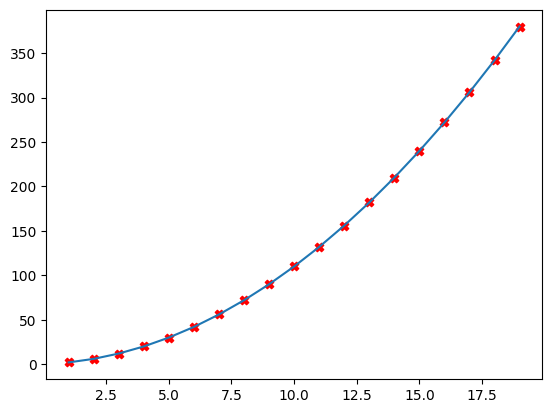

In [229]:
plt.scatter(x, y, marker = 'X', color = 'red')
plt.plot(x, X @ w_final + b_final)
plt.show

## Gradient descent with z-score normalization
Converges in only 1000 iterations and with 0.01 learning rate

In [235]:
def z_score_normalization(X, w, b):
    
    m, n = X.shape
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    print(mu, sigma)
    
    X_norm = (X - mu)/ sigma
    # print(b_norm, b)

    return (X_norm, mu, sigma)
    

In [236]:
X_norm, mu, sigma = z_score_normalization(X, w, b)


[130.  10.] [112.75637454   5.47722558]


In [237]:
w_final, b_final = gradient_descent(X_norm, y, w, b, 0.1, 1000)
print(w_final, b_final)

[109.63272276   8.60087736] 139.9999999999999


<function matplotlib.pyplot.show(close=None, block=None)>

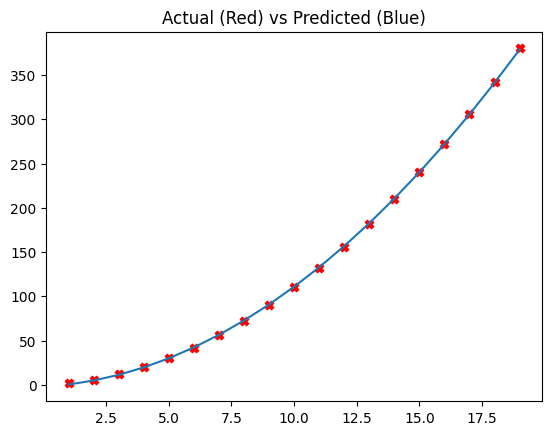

In [238]:
plt.scatter(x, y, marker = 'X', color = 'red')
plt.plot(x, X_norm @ w_final + b_final)
plt.title("Actual (Red) vs Predicted (Blue)")
plt.show

## Pre-post normalization comparison of training set 
We can see that the scale of normalised dataset has become confined after normalization

Text(0.5, 1.0, 'Post-normalization')

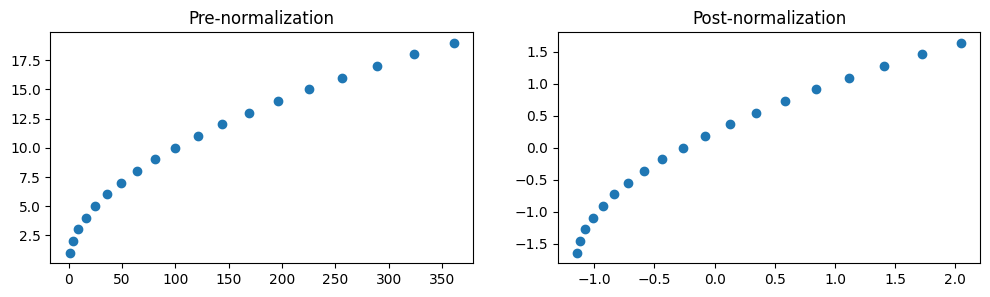

In [239]:
fig,ax = plt.subplots(1, 2, figsize=(12,3))
ax[0].scatter(X[:,0], X[:,1])
ax[0].set_title("Pre-normalization")
ax[1].scatter(X_norm[:,0], X_norm[:,1])
ax[1].set_title("Post-normalization")

## Build everything from scratch, well done!